<a href="https://colab.research.google.com/github/rayPriyanka1/Research-Through-Data-Science/blob/main/DAY%208/Heart_Disease_Prediction_Using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    confusion_matrix,ConfusionMatrixDisplay,classification_report, accuracy_score, precision_score, recall_score,
    f1_score, roc_curve,roc_auc_score, auc, RocCurveDisplay
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/content/drive/MyDrive/Datasets/heart.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

df.columns = df.columns.str.strip()
print(df.columns)

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [ ]:
# Create LabelEncoder object
le = LabelEncoder()

# Apply Label Encoding
df['Sex'] = le.fit_transform(df['Sex'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])


# List of columns to one-hot encode
columns_to_encode = ['ChestPainType', 'RestingECG', 'ST_Slope']

# Apply one-hot encoding
df = pd.get_dummies(df, columns=columns_to_encode)

In [ ]:
# Separate input (X) and output (y)
X = df.drop('HeartDisease', axis=1)  # Everything except HeartDisease
y = df['HeartDisease']                # Only HeartDisease


# Split: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,    # 20% for test
    random_state=20   # Same result every time
)

In [ ]:
# Create scaler
scaler = StandardScaler()

# Learn from training data and scale it
X_train = scaler.fit_transform(X_train)

# Scale test data (just transform, don't fit)
X_test = scaler.transform(X_test)

Accuracy:  0.86413
Precision: 0.86465
Recall:    0.86413
F1 Score:  0.86375


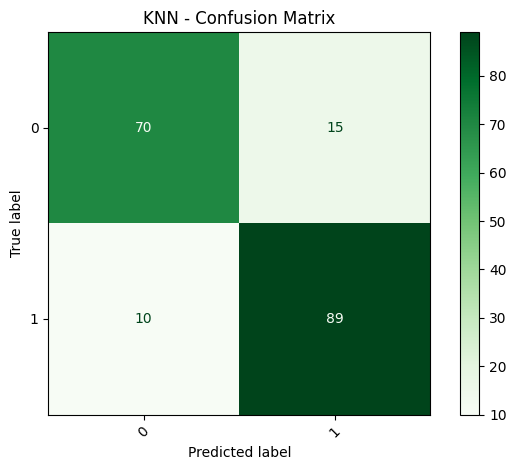

Classification Report:
              precision    recall  f1-score   support

           0    0.87500   0.82353   0.84848        85
           1    0.85577   0.89899   0.87685        99

    accuracy                        0.86413       184
   macro avg    0.86538   0.86126   0.86267       184
weighted avg    0.86465   0.86413   0.86375       184



In [ ]:
# 1. Train KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors
knn_model.fit(X_train, y_train)

# 2. Predict on Test Set
y_pred = knn_model.predict(X_test)
prediction_probabilities = knn_model.predict_proba(X_test)[:, 1]

# 3. Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# 4. Print Basic Metrics (5-digit precision)
print(f"Accuracy:  {accuracy:.5f}")
print(f"Precision: {precision:.5f}")
print(f"Recall:    {recall:.5f}")
print(f"F1 Score:  {f1:.5f}")

# 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=knn_model.classes_).plot(cmap='Greens', xticks_rotation=45)
plt.title("KNN - Confusion Matrix")
plt.tight_layout()
plt.show()

# 6. Classification Report (5-digit precision)
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0, digits=5))

In [ ]:
tn, fp, fn, tp = cm.ravel()

# Print values
print("TP:", tp, "TN:", tn, "FP:", fp, "FN:", fn)

TP: 89 TN: 70 FP: 15 FN: 10


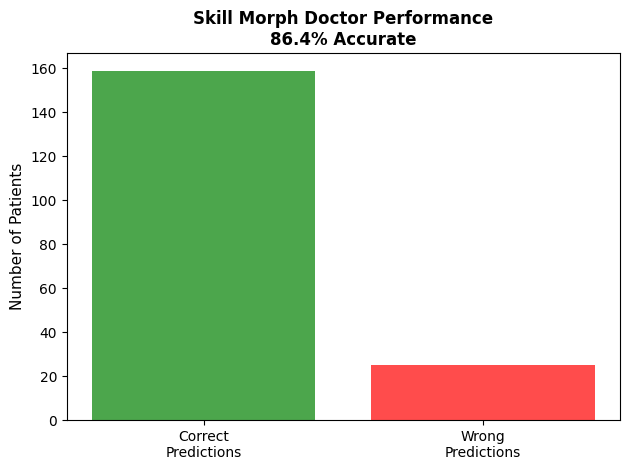

In [ ]:
# Accuracy visualization
plt.subplot()
categories = ['Correct\nPredictions', 'Wrong\nPredictions']
values = [cm[0,0] + cm[1,1], cm[0,1] + cm[1,0]]
colors = ['green', 'red']
plt.bar(categories, values, color=colors, alpha=0.7)
plt.title(f'Skill Morph Doctor Performance\n{accuracy*100:.1f}% Accurate', fontweight='bold', fontsize=12)
plt.ylabel('Number of Patients', fontsize=11)

plt.tight_layout()
plt.show()

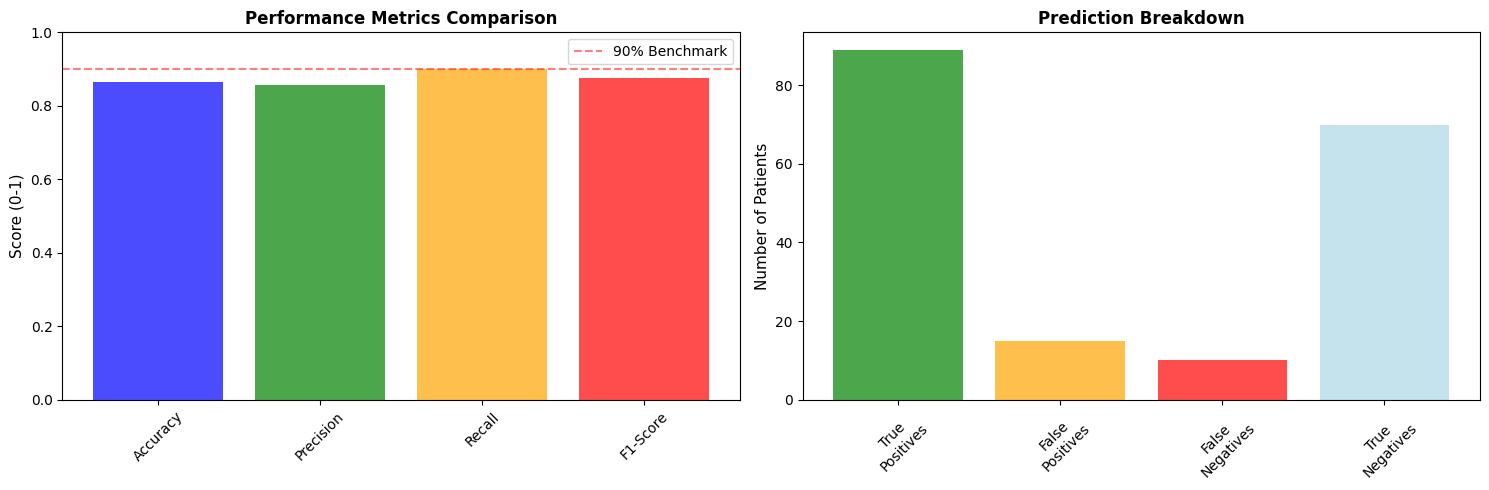

In [ ]:
# Calculate detailed metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


# Create detailed metrics visualization
plt.figure(figsize=(15, 5))

# Subplot 1: Metrics comparison
plt.subplot(1, 2, 1)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]
colors = ['blue', 'green', 'orange', 'red']
bars = plt.bar(metrics, values, color=colors, alpha=0.7)
plt.ylim(0, 1)
plt.title('Performance Metrics Comparison', fontweight='bold', fontsize=12)
plt.ylabel('Score (0-1)', fontsize=11)


# Add benchmark line
plt.axhline(y=0.9, color='red', linestyle='--', alpha=0.5, label='90% Benchmark')
plt.legend()
plt.xticks(rotation=45)



# Subplot 2: Precision vs Recall visualization
plt.subplot(1, 2, 2)
# Create a simple precision-recall visualization
categories = ['True\nPositives', 'False\nPositives', 'False\nNegatives', 'True\nNegatives']
tp, fp, fn, tn = cm[1,1], cm[0,1], cm[1,0], cm[0,0]
counts = [tp, fp, fn, tn]
colors_pr = ['green', 'orange', 'red', 'lightblue']
bars_pr = plt.bar(categories, counts, color=colors_pr, alpha=0.7)
plt.title('Prediction Breakdown', fontweight='bold', fontsize=12)
plt.ylabel('Number of Patients', fontsize=11)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ROC-AUC Score: 0.9291740938799764


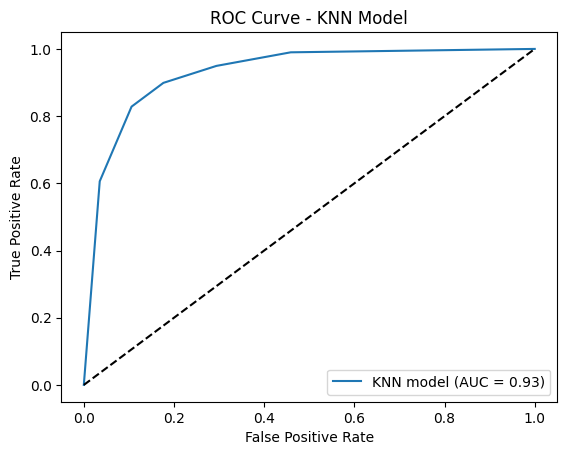

In [ ]:
roc_auc = roc_auc_score(y_test, prediction_probabilities)
fpr, tpr, thresholds = roc_curve(y_test, prediction_probabilities)
auc_score = roc_auc_score(y_test, prediction_probabilities)

print("ROC-AUC Score:", roc_auc)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label='KNN model (AUC = %.2f)' % roc_auc)
plt.plot([0,1], [0,1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN Model')
plt.legend(loc='lower right')
plt.show()

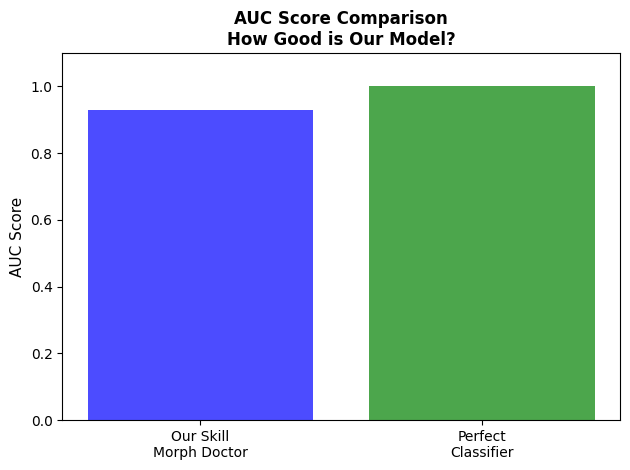

In [ ]:
# Subplot 2: AUC Comparison
plt.subplot()
model_names = ['Our Skill\nMorph Doctor', 'Perfect\nClassifier']
auc_scores = [auc_score, 1.0]
colors_auc = ['blue', 'green']
bars_auc = plt.bar(model_names, auc_scores, color=colors_auc, alpha=0.7)

plt.ylim(0, 1.1)
plt.ylabel('AUC Score', fontsize=11)
plt.title('AUC Score Comparison\nHow Good is Our Model?', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()